In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'soft')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [16]:
from sklearn.metrics import accuracy_score 
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.8345
RandomForestClassifier 0.856
SVC 0.869
VotingClassifier 0.8635


In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.867

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True
)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.855625

In [19]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8675

In [20]:
bag_clf.oob_decision_function_

array([[0.0804829 , 0.9195171 ],
       [0.68965517, 0.31034483],
       [0.56565657, 0.43434343],
       ...,
       [0.90263692, 0.09736308],
       [0.07070707, 0.92929293],
       [0.23636364, 0.76363636]])

In [22]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.862

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
rand_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rand_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rand_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.08987788934590489
sepal width (cm) 0.021980047528052972
petal length (cm) 0.4459629960017467
petal width (cm) 0.4421790671242954


In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=200, 
    algorithm='SAMME.R', 
    learning_rate=0.5
)
ada_clf.fit(X_train,y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8585

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

X, y = make_regression(10000,1,noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X_train, y_train)
y2 = y_train - tree_reg1.predict(X_train) 

tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X_train, y2)
y3 = y2 - tree_reg2.predict(X_train) 

tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X_train, y3)

y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [112]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print(rmse)

16.463960131581043


In [113]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train,y_train)
y_pred = gbrt.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print(rmse)

16.46396013158107


In [114]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
svr_reg = svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVR()),
])
svr_reg.fit(X_train, y_train)
y_pred = svr_reg.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print(rmse)

13.357656598620137


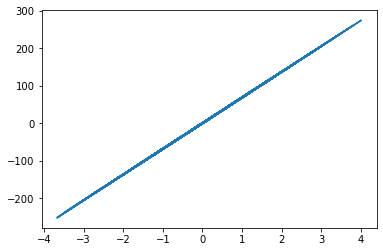

In [115]:
import matplotlib.pyplot as plt
plt.plot(X[:,0],y)

In [110]:
plt.plot(X[:,1],y)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [141]:
import numpy as np
N=10000
noise = 0.4
X = np.random.rand(N)*2-1
y = X**2+(np.random.rand(X.shape[0])*noise-noise/2)
X.shape = [X.shape[0],1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train,y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)+1
print(best_n_estimators)

78


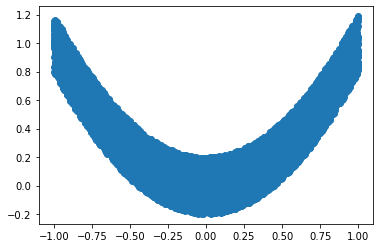

In [142]:
plt.scatter(X,y)

(0.0133, 0.0137)

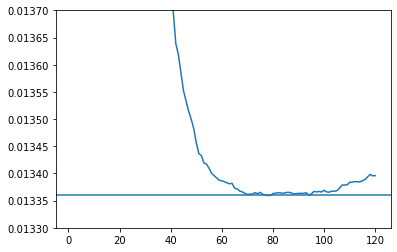

In [151]:
plt.plot(np.arange(len(errors))+1,errors)
plt.axhline(y=min(errors))
plt.ylim(0.0133,0.0137)

In [152]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
best_n = 0
error_going_up = 0
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_pred,y_test)
    if val_error < min_val_error:
        min_val_error = val_error
        best_n = n_estimators
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break
print(best_n)

70
